<a href="https://colab.research.google.com/github/cyanidekawaii/iit_intern/blob/main/distfit_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~ In this section, we'll use the distfit [8] library to find distributions that fit the data that we provide.

In [ ]:
#install and import libraries
!pip install distfit

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from distfit import distfit
import scipy.stats
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

We'll first find the distribution of data that we will generate using the scipy library and then look into real world datasets.

In [ ]:
# generating data with gamma distribution
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)

In [ ]:
# initialize distfit
dist = distfit(todf=True)

# determine best-fitting probability distribution for data
dist.fit_transform(data)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0340481] [loc=5.446 scale=2.751]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0626218] [loc=1.539 scale=3.907]
[distfit] >[pareto    ] [0.51 sec] [RSS: 0.250193] [loc=0.001 scale=1.539]
[distfit] >[dweibull  ] [0.18 sec] [RSS: 0.0240912] [loc=5.061 scale=2.179]
[distfit] >[t         ] [0.21 sec] [RSS: 0.0186383] [loc=4.934 scale=2.248]
[distfit] >[genextreme] [0.16 sec] [RSS: 0.0033765] [loc=4.087 scale=1.826]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.000245404] [loc=1.507 scale=1.946]
[distfit] >[lognorm   ] [0.22 sec] [RSS: 0.0017492] [loc=0.627 scale=4.133]
[distfit] >[beta      ] [0.31 sec] [RSS: 0.000257842] [loc=1.515 scale=159.245]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.187239] [loc=1.539 scale=21.309]
[distfit] >[loggamma  ] [0.15 sec] [RSS: 0.0348685] [loc=-1378.437 scale=168.988]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x7fab49271190>,
  'stats': 'RSS',
  'params': (2.0242173244686734, 1.5066249650017167, 1.9461175043392918),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fab479dadd0>,
  'score': 0.00024540444327410146,
  'loc': 1.5066249650017167,
  'scale': 1.9461175043392918,
  'arg': (2.0242173244686734,),
  'CII_min_alpha': 2.217190992228679,
  'CII_max_alpha': 10.815064959621404},
 'summary':          distr     score  LLE          loc       scale  \
 0        gamma  0.000245  NaN     1.506625    1.946118   
 1         beta  0.000258  NaN     1.515131  159.244813   
 2      lognorm  0.001749  NaN      0.62701    4.133267   
 3   genextreme  0.003376  NaN     4.087018    1.825562   
 4            t  0.018638  NaN     4.933552    2.248426   
 5     dweibull  0.024091  NaN     5.061252    2.179264   
 6         norm  0.034048  NaN     5.445973    2.751257   
 7     loggamma  0.034869  NaN -1378.437332

As expected, we see that the distfit library indicates that the data has a gamma distribution. Now, we can plot to see how good the fit actually is.

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab47a4fd10>)

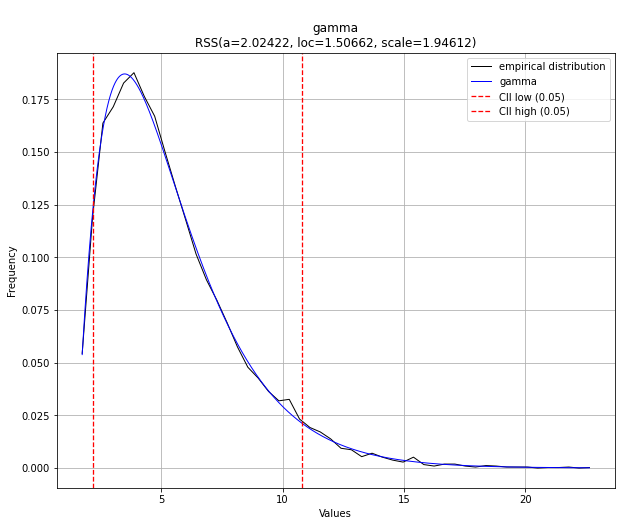

In [ ]:
dist.plot()

comparing possible distributions through Residual Sum of Squares(RSS) value ~

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab4503ac90>)

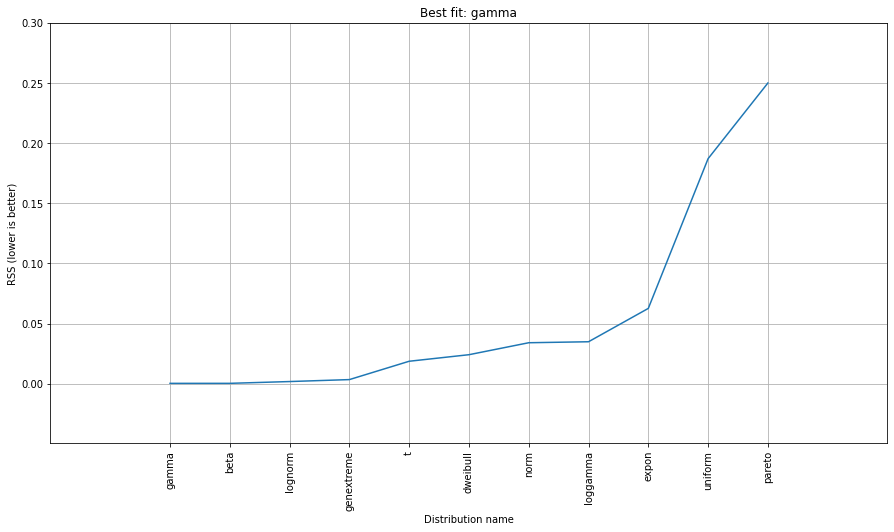

In [ ]:
dist.plot_summary()

We can also make *predictions* using the distfit library. The predict function will compute the probability of samples in the fitted PDF.

In [ ]:
#random independent variable values, our input values
y = [3,4,5,6,10,11,12,18,20]

#make prediction on new datapoints based on the fit
results = dist.predict(y)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


In [ ]:
# show the predictions for y
print(dist.results['y_pred'])

# show the probabilities for y that belong with the predictions
print(dist.results['y_proba'])

['none' 'none' 'none' 'none' 'none' 'up' 'up' 'up' 'up']
[0.26104733 0.40402061 0.47172501 0.40402061 0.12668212 0.1040226
 0.09039885 0.00929648 0.00739305]


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab44b9a8d0>)

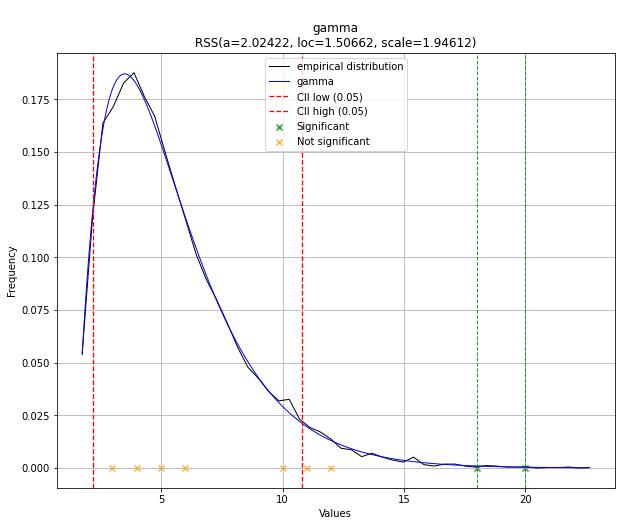

In [ ]:
dist.plot()

In [ ]:
print(dist.results['df'])

# y: input values
# y_proba: corrected P-values after multiple test correction (default: fdr_bh).
# y_pred: True in case y_proba <= alpha
# P: raw P-values

      y   y_proba y_pred         P
0   3.0  0.261047   none  0.174032
1   4.0  0.404021   none  0.359129
2   5.0  0.471725   none  0.471725
3   6.0  0.404021   none  0.335299
4  10.0  0.126682   none  0.070379
5  11.0  0.104023     up  0.046232
6  12.0  0.090399     up  0.030133
7  18.0  0.009296     up  0.002066
8  20.0  0.007393     up  0.000821


----

#####Real world datasets ~

Dataset on climate (Climate Change: Earth Surface Temperature Data, kaggle) [10]

In [ ]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

basic eda

In [ ]:
df2=df.dropna()
df2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [ ]:
#variables present
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


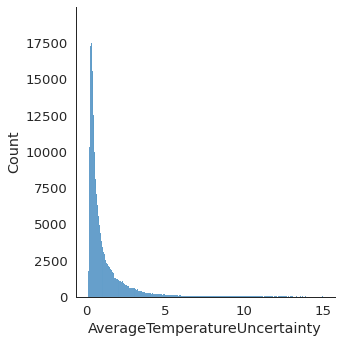

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)

sns.displot(df2['AverageTemperatureUncertainty'])

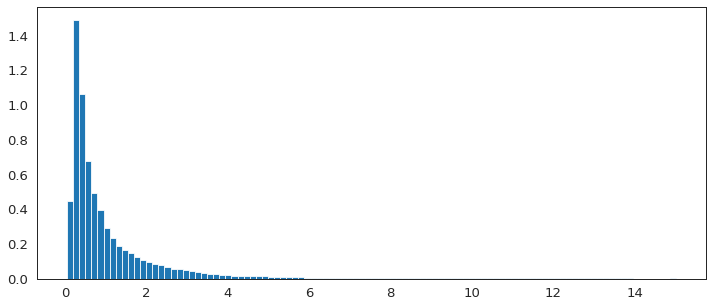

In [ ]:
# viewing the probability distribution function of the variable
plt.hist(df2['AverageTemperatureUncertainty'], bins = 100, density = True)
plt.show()

In [ ]:
X = df2['AverageTemperatureUncertainty'].values #creating a numpy array of the target variable

In [ ]:
# initialize distfit
dist = distfit()

# determine best-fitting probability distribution for data
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.917092] [loc=1.019 scale=1.203]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0752452] [loc=0.052 scale=0.967]
[distfit] >[pareto    ] [9.99 sec] [RSS: 0.121777] [loc=-0.598 scale=0.650]
[distfit] >[dweibull  ] [13.6 sec] [RSS: 0.23365] [loc=0.396 scale=0.559]
[distfit] >[t         ] [3.01 sec] [RSS: 0.235542] [loc=0.489 scale=0.299]
[distfit] >[genextreme] [8.10 sec] [RSS: 0.0471987] [loc=0.431 scale=0.325]
[distfit] >[gamma     ] [6.91 sec] [RSS: 0.141577] [loc=0.052 scale=1.562]
[distfit] >[lognorm   ] [13.7 sec] [RSS: 0.0216131] [loc=0.052 scale=0.575]
[distfit] >[beta      ] [15.7 sec] [RSS: 0.0845669] [loc=0.052 scale=217165.464]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.80386] [loc=0.052 scale=14.951]
[distfit] >[loggamma  ] [5.63 sec] [RSS: 0.931355] [loc=-439.326 scale=57.263]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.lognorm_gen at 0x7fab4923c5d0>,
  'stats': 'RSS',
  'params': (0.993682951864497, 0.05196303787514622, 0.5753881393346342),
  'name': 'lognorm',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fab4475a1d0>,
  'score': 0.02161314855445133,
  'loc': 0.05196303787514622,
  'scale': 0.5753881393346342,
  'arg': (0.993682951864497,),
  'CII_min_alpha': 0.16419657245281488,
  'CII_max_alpha': 3.0018078603944054},
 'summary':          distr     score  LLE         loc          scale  \
 0      lognorm  0.021613  NaN    0.051963       0.575388   
 1   genextreme  0.047199  NaN    0.430532       0.324894   
 2        expon  0.075245  NaN       0.052        0.96719   
 3         beta  0.084567  NaN    0.051999  217165.464202   
 4       pareto  0.121777  NaN   -0.597773       0.649773   
 5        gamma  0.141577  NaN       0.052       1.562298   
 6     dweibull   0.23365  NaN       0.396       0.559165   
 7            t  0.23554

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab43fdec90>)

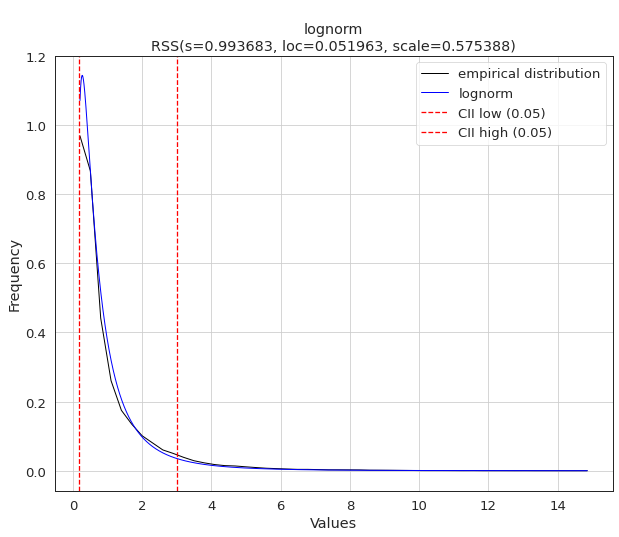

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab43f0dbd0>)

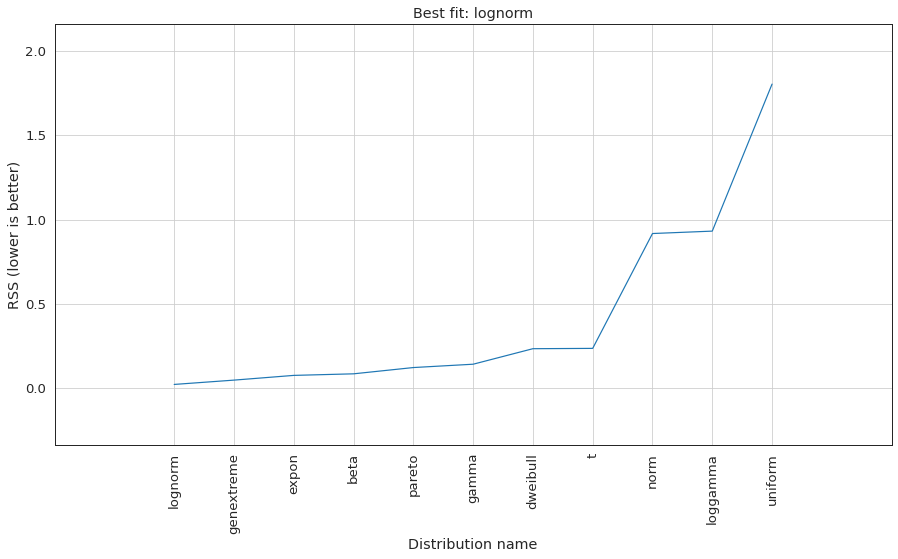

In [ ]:
dist.plot_summary()

so, finally we see that the lognorm distribution fits our data the best.

let's find the distribution of another column. We will take AverageTemperature as the variable~

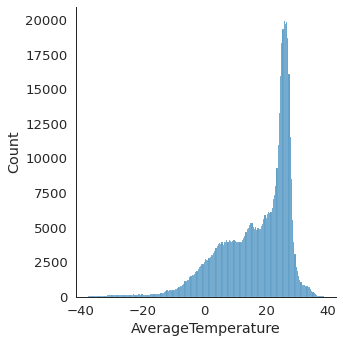

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)

sns.displot(df2['AverageTemperature'])

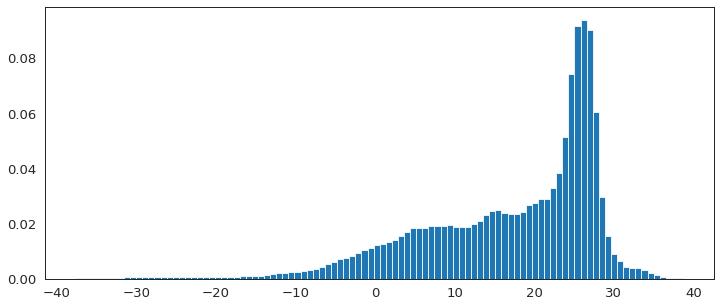

In [ ]:
#viewing the pdf
plt.hist(df2['AverageTemperature'], bins = 100, density = True)
plt.show()

In [ ]:
Y = df2['AverageTemperature'].values #creating a numpy array

In [ ]:
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(Y)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00969425] [loc=17.193 scale=10.954]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0232704] [loc=-37.658 scale=54.851]
[distfit] >[pareto    ] [19.7 sec] [RSS: 0.0234054] [loc=-2933202495.758 scale=2933202458.100]
[distfit] >[dweibull  ] [8.25 sec] [RSS: 0.00867907] [loc=17.350 scale=9.850]
[distfit] >[t         ] [5.35 sec] [RSS: 0.00947836] [loc=18.119 scale=9.814]
[distfit] >[genextreme] [32.1 sec] [RSS: 0.00789055] [loc=14.271 scale=11.606]
[distfit] >[gamma     ] [9.17 sec] [RSS: 0.0101405] [loc=-170.319 scale=0.709]
[distfit] >[lognorm   ] [19.0 sec] [RSS: 0.00971007] [loc=-4141.265 scale=4158.466]
[distfit] >[beta      ] [17.4 sec] [RSS: 0.00729038] [loc=-146.331 scale=185.226]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0180934] [loc=-37.658 scale=76.500]
[distfit] >[loggamma  ] [1.47 sec] [RSS: 0.0042541] [loc=28.758 scale=3.228]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x7fab4922afd0>,
  'stats': 'RSS',
  'params': (0.29360742967792425, 28.75842764414215, 3.2283283585493),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fab43b62b50>,
  'score': 0.004254102306934357,
  'loc': 28.75842764414215,
  'scale': 3.2283283585493,
  'arg': (0.29360742967792425,),
  'CII_min_alpha': -5.35803113553737,
  'CII_max_alpha': 29.732974553677185},
 'summary':          distr     score  LLE                loc              scale  \
 0     loggamma  0.004254  NaN          28.758428           3.228328   
 1         beta   0.00729  NaN        -146.330969         185.226317   
 2   genextreme  0.007891  NaN          14.270647           11.60597   
 3     dweibull  0.008679  NaN          17.349535           9.849818   
 4            t  0.009478  NaN          18.118925           9.814334   
 5         norm  0.009694  NaN          17.193354          10.953956   
 6      logno

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab43a2ce10>)

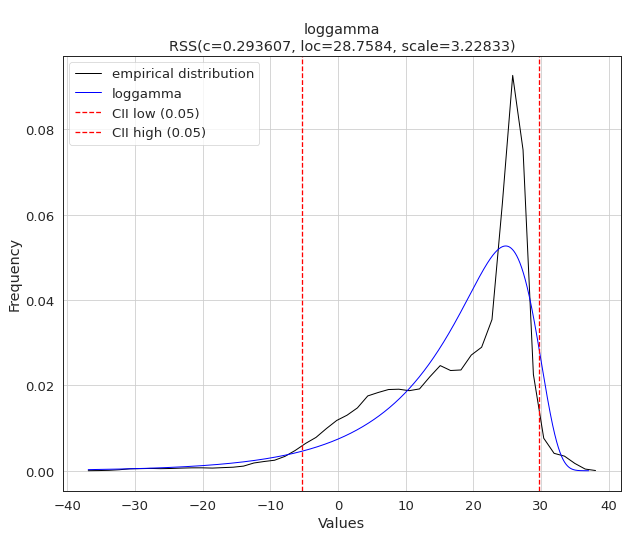

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab4398ec10>)

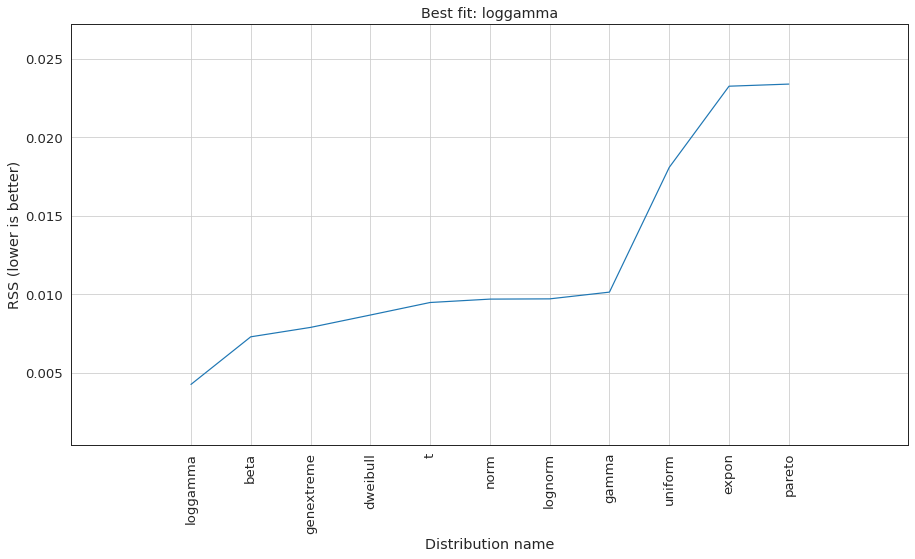

In [ ]:
dist.plot_summary()

We finally conclude that finding a distribution that fits our data is a key part in making predictions. Libraries like distfit and fitter make the procedure straightforward and convenient.